# MNIST Neural Network

### Imports

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

### Load Data and Create Model

In [18]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [ ]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


### Train

In [ ]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10


ValueError: in user code:

    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(100,) and logits.shape=(2800, 10)


In [5]:
# print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (100, 784)                0         
                                                                 
 dense (Dense)               (100, 200)                157000    
                                                                 
 dense_1 (Dense)             (100, 10)                 2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [6]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9798
loss:  0.07328444719314575 
 accuracy:  0.9797999858856201


In [7]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [8]:
new_model = tf.keras.models.load_model('num_model')

In [9]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [10]:
print(len(x_test))

10000


8


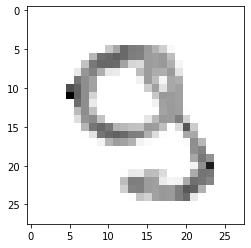

In [11]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [12]:
print(np.argmax(predictions[9876]))

1


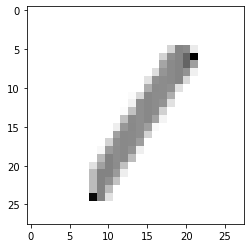

In [13]:
plt.imshow(x_test[9876],cmap=plt.cm.binary)